In [9]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [10]:
df100 = pd.read_csv("data/1.0.csv")
df131 = pd.read_csv("data/1.31.csv")
#df132 = pd.read_csv("data/1.32.csv")
df132 = pd.read_csv("data/2016-01-26-hc-1.32.csv")
dftest = pd.read_csv("data/2016-01-26-hc-test.csv")

## Settings

In [11]:
percentageBarGraphMode = False
barGraphMode = False
percentageDefaultGraphMode = False
defaultGraphMode = True

## Concatenation of Data

In [12]:
relevantColumns = ['id', 'serverTime', 'playerId', 'type', 'section']

#part100 = df100.loc[:,relevantColumns]
part131 = df131.loc[:,relevantColumns]
part132 = df132.loc[:,relevantColumns]
parttest = dftest.loc[:,relevantColumns]

#df = pd.concat([part100, part131, part132])
#df = pd.concat([part131, part132])
df = pd.concat([part131, part132, parttest])

df[df["type"]=="death"]["playerId"].value_counts().sort_values(ascending=False).head()
#df[df["playerId"]=="eabf68ed-2e17-4e23-8f3f-a8b9e57ce989"]

eabf68ed-2e17-4e23-8f3f-a8b9e57ce989    96
814c40c5-ea03-4359-875f-edb48fbe4bbf    78
a7655394-038a-4e15-9fc9-6c039a9d0761    61
b4cdc3f4-c6a5-4c52-8dbd-b3769b579b56    41
3729a7cc-79e9-466b-bdc7-84f072c8607d    37
Name: playerId, dtype: int64

## Generic Treatment

Generic graph treatment

In [13]:
%run plotUtilities.ipynb

gameSessionCount=908
#death=2248
mean#death=2.47577092511
#pickup=719
mean#pickup=0.791850220264
#equip=1703
mean#equip=1.87555066079
#craft=453
mean#craft=0.498898678414
#complete=137
mean#complete=0.150881057269
#switch=318
mean#switch=0.350220264317
#reach=2716
mean#reach=2.99118942731


/Users/raphik12/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


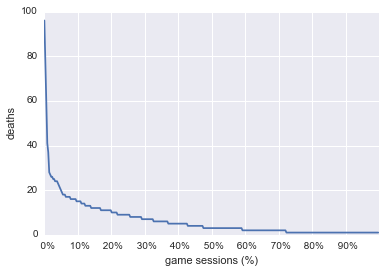

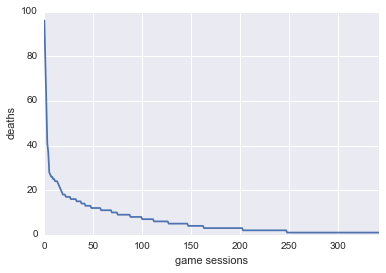

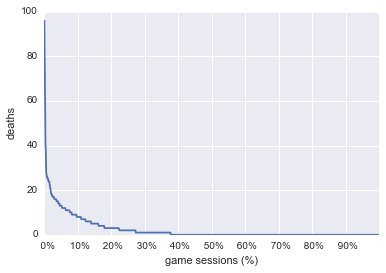

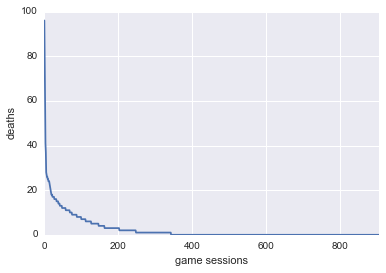

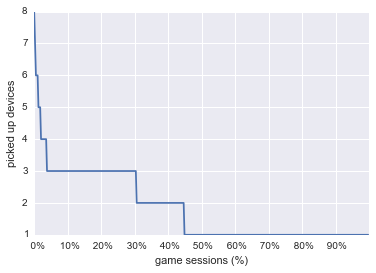

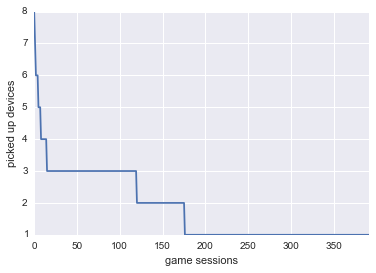

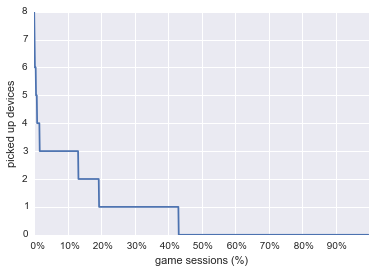

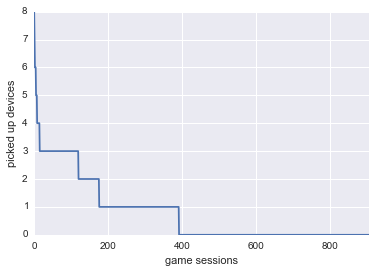

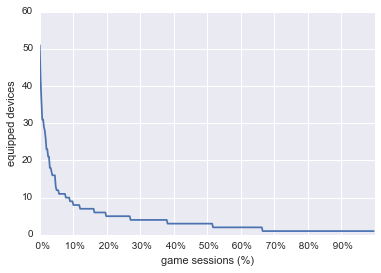

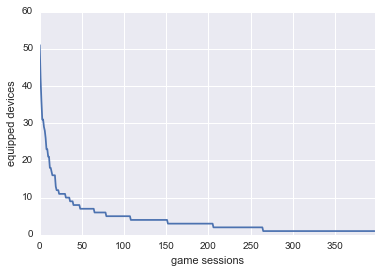

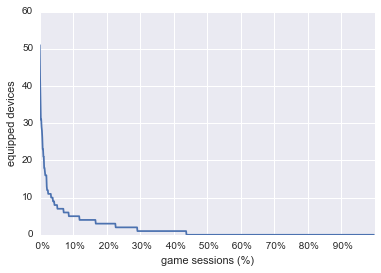

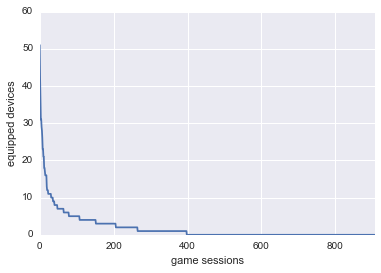

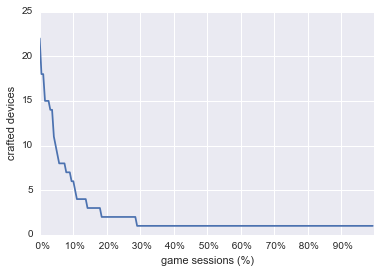

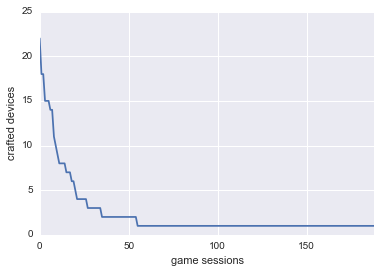

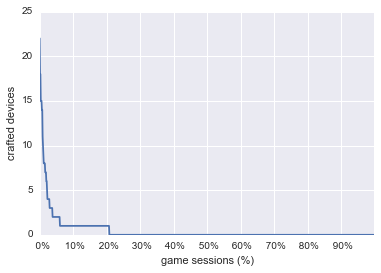

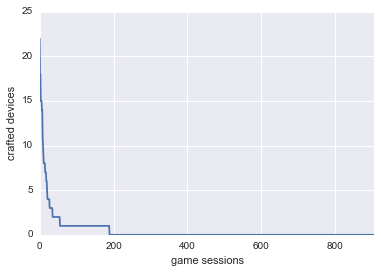

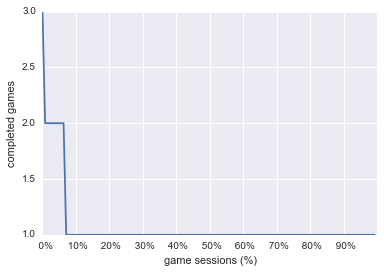

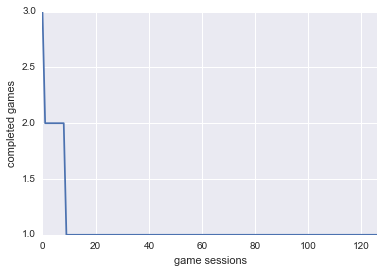

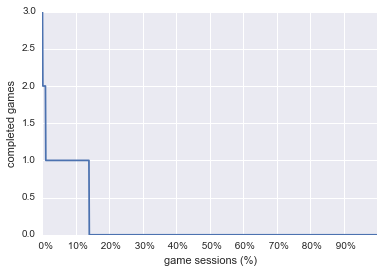

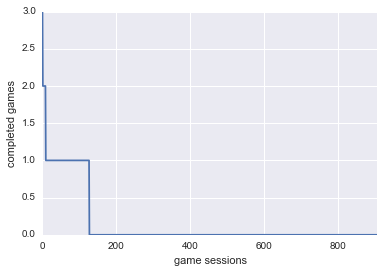

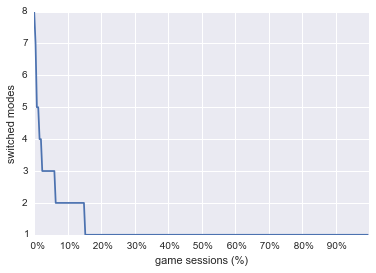

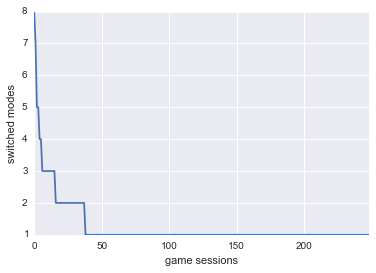

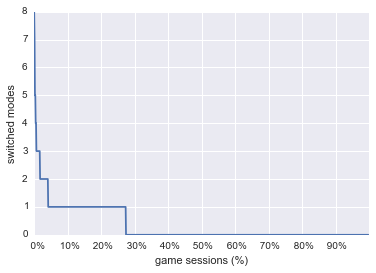

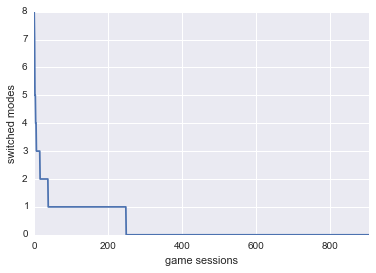

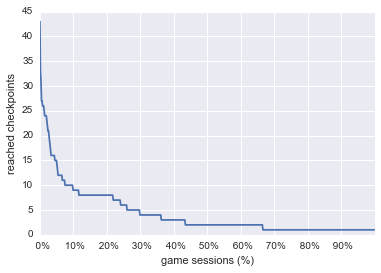

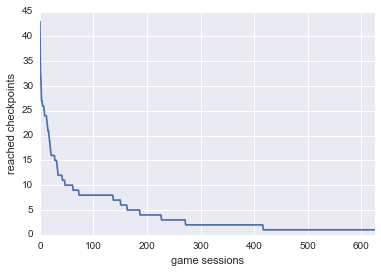

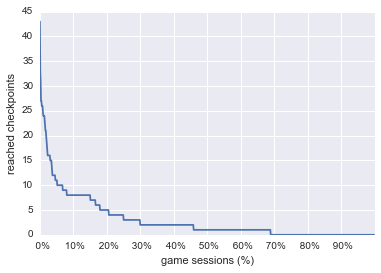

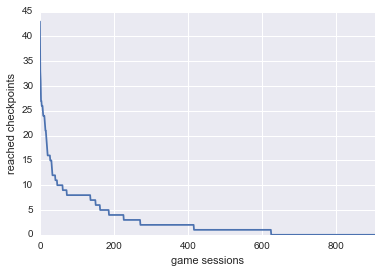

In [14]:
gameSessionCount = df["playerId"].nunique()
print 'gameSessionCount={0}'.format(gameSessionCount)

events = ['death', 'pickup', 'equip', 'craft', 'complete', 'switch', 'reach']
#events = ['complete']

graphLabels = pd.Series(['deaths','picked up devices','equipped devices',
                         'crafted devices','completed games', 'switched modes', 'reached checkpoints'],index=events)
#graphLabels = pd.Series(['completed games'],index=events)   

# legacy
alternates = pd.Series([[],[],[],[],['completed'],['switched:'],['reached']],index=events)
#alternates = pd.Series([['completed']],index=events)
#alternates = pd.Series([[]],index=events)

for event in events:
    studiedEvent = event    

    columnName = studiedEvent+"s"
    graphLabel = graphLabels[event]

    studiedEventCount = df[df["type"]==studiedEvent]["id"].count()
    
    # legacy
    for alternate in alternates[studiedEvent]:
        studiedEventCount = studiedEventCount + df[df["type"]==alternate]["id"].count()
    
    print '#{0}={1}'.format(studiedEvent,studiedEventCount)
    mean = studiedEventCount / float(gameSessionCount)
    print 'mean#{0}={1}'.format(studiedEvent, mean)

    positiveGameSessions = df[df["type"]==studiedEvent]["playerId"].value_counts()
    
    # legacy
    for alternate in alternates[studiedEvent]:
        alternateTable = df[df["type"]==alternate]["playerId"].value_counts()
        positiveGameSessions = positiveGameSessions.combine_first(alternateTable)
        positiveGameSessions = positiveGameSessions.sort_values(ascending=False)

    positiveGameSessionCount = positiveGameSessions.count()
    positiveGameSessionCountTable = pd.DataFrame({columnName: positiveGameSessions.values})

    
    genericTreatment(positiveGameSessionCountTable, "game sessions", graphLabel,
                     positiveGameSessionCount)

    positiveGameSessionCountTable.describe()

    negativeGameSessionCountSeries = pd.Series(0, index=(list(range(positiveGameSessionCount,gameSessionCount-1))))
    negativeGameSessionCountTable = pd.DataFrame({columnName: negativeGameSessionCountSeries})

    fullEventGameSessionCountTable = pd.concat([positiveGameSessionCountTable, negativeGameSessionCountTable]) 

    genericTreatment(fullEventGameSessionCountTable, "game sessions", graphLabel,
                     gameSessionCount)
    

    fullEventGameSessionCountTable.describe()
    

## Specific Treatment
### Events

908
events    266
dtype: int64
events    273
dtype: int64


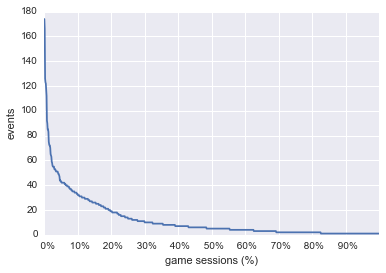

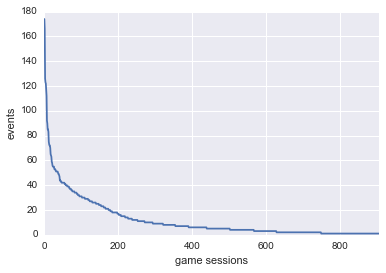

In [15]:
eventstable = pd.DataFrame({"events" : df["playerId"].value_counts().values})

eventsLabel = "events"
totalEventsCount = int(eventstable.count())
genericTreatment(eventstable, "game sessions", eventsLabel, totalEventsCount)
print totalEventsCount
print pd.DataFrame({"events" : df131["playerId"].value_counts().values}).count()
print pd.DataFrame({"events" : df132["playerId"].value_counts().values}).count()

### Checkpoints


checkpoints=
Checkpoint00    None
Checkpoint01     596
Checkpoint02     316
Checkpoint03     200
Checkpoint04     174
Checkpoint05     162
Checkpoint06     166
Checkpoint07     173
Checkpoint08     177
Name: section, dtype: object

totalCheckpointsCount=1964

reachedGameSessionCount=386

neverReachedGameSessionCount=256

mostReachedCheckpointCount=596

fullMostReachedCheckpointCount=642

fullCheckpointsTable=
  checkpoints
0         642
1         596
2         316
3         200
4         174
5         162
6         166
7         173
8         177

maxCheckpointCounts=
Checkpoint00    None
Checkpoint01     134
Checkpoint02      70
Checkpoint03      12
Checkpoint04      18
Checkpoint05       8
Checkpoint06       8
Checkpoint07      14
Checkpoint08     122
Name: maxCheckpoint, dtype: object

fullMaxCheckpointCountsTable=
  fullMaxCheckpoint
0               256
1               134
2                70
3                12
4                18
5                 8
6                 8
7        

,fullMaxCheckpoint
count,9
unique,8
top,8
freq,2


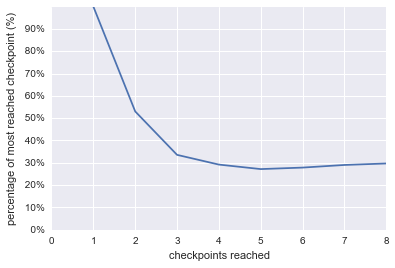

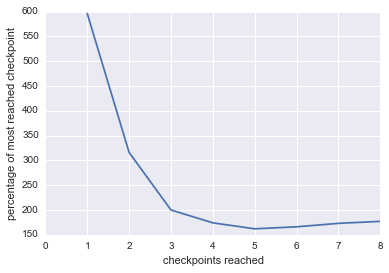

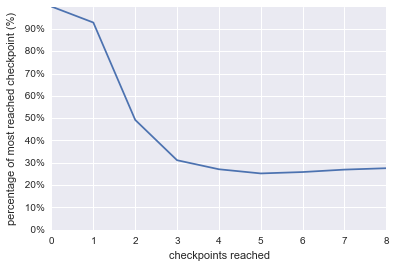

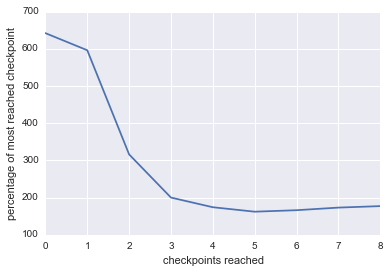

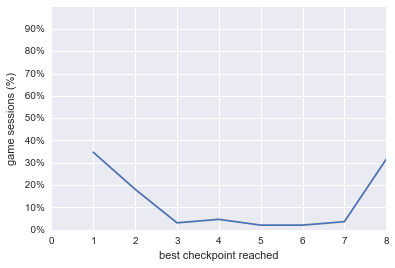

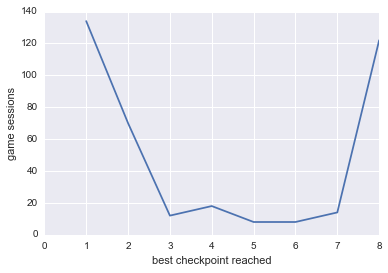

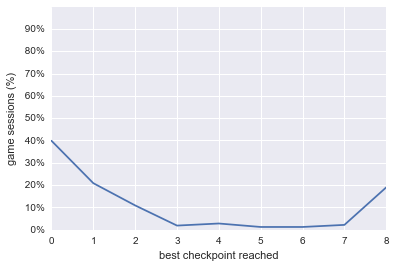

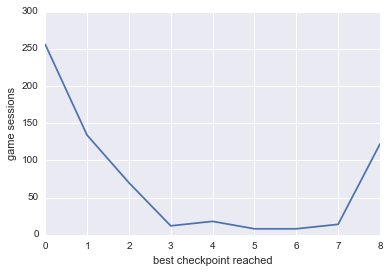

In [16]:
#checkpointsDF = dftest
#checkpointsDF = df132
checkpointsDF = pd.concat([part132, parttest])
checkpointsGameSessionCount = checkpointsDF["playerId"].nunique()

checkpoints = checkpointsDF[checkpointsDF["type"]=="reach"]["section"].value_counts()

#for alternate in alternates["reach"]:
#    checkpoints = checkpoints + checkpointsDF[checkpointsDF["type"]==alternate]["section"].value_counts()

checkpoints['Checkpoint00'] = None
checkpoints = checkpoints.sort_index()
totalCheckpointsCount = checkpoints.sum()
print '\ncheckpoints=\n{0}'.format(checkpoints)
print '\ntotalCheckpointsCount={0}'.format(totalCheckpointsCount)


reachedGameSessions = checkpointsDF[checkpointsDF["type"]=="reach"]["playerId"].value_counts()

#for alternate in alternates["reach"]:
#    checkpoints = checkpoints + checkpointsDF[checkpointsDF["type"]==alternate]["playerId"].value_counts()

reachedGameSessionCount = reachedGameSessions.count()
print '\nreachedGameSessionCount={0}'.format(reachedGameSessionCount)
neverReachedGameSessionCount = checkpointsGameSessionCount - reachedGameSessionCount
print '\nneverReachedGameSessionCount={0}'.format(neverReachedGameSessionCount)

mostReachedCheckpointCount = checkpoints.values.max()
print '\nmostReachedCheckpointCount={0}'.format(mostReachedCheckpointCount)

checkpointstable = pd.DataFrame({"checkpoints" : checkpoints.values})
#reachedGameSessionCount
genericTreatment( checkpointstable, "checkpoints reached", "percentage of most reached checkpoint", 0, mostReachedCheckpointCount, False, True )
#plt.ylim(0,mostReachedCheckpointCount)


fullCheckpointsTable = checkpointstable
fullCheckpointsTable['checkpoints'][0] = checkpointsGameSessionCount
fullMostReachedCheckpointCount = fullCheckpointsTable.values.max()
print '\nfullMostReachedCheckpointCount={0}'.format(fullMostReachedCheckpointCount)
print '\nfullCheckpointsTable=\n{0}'.format(fullCheckpointsTable)
#gameSessionCount
genericTreatment( fullCheckpointsTable, "checkpoints reached", "percentage of most reached checkpoint", 0, fullMostReachedCheckpointCount, False, True )
#plt.ylim(0,fullMostReachedCheckpointCount)


checkpointsByGameSession = checkpointsDF[checkpointsDF["type"]=="reach"].loc[:,['section','playerId']]

#for alternate in alternates["reach"]:
##    checkpointsByGameSession = checkpointsByGameSession.combine_first(checkpointsDF[checkpointsDF["type"]==alternate].loc[:,['section','playerId']])
#    checkpointsByGameSession = pd.merge(checkpointsByGameSession,checkpointsDF[checkpointsDF["type"]==alternate].loc[:,['section','playerId']])

grouped = checkpointsByGameSession.groupby("playerId")
maxCheckpointWithIDs = grouped.max()
maxCheckpointWithIDs.head()

maxCheckpointTable = pd.DataFrame({"maxCheckpoint" : maxCheckpointWithIDs.values.flatten()})
maxCheckpointCounts = maxCheckpointTable["maxCheckpoint"].value_counts()
maxCheckpointCounts['Checkpoint00'] = None
maxCheckpointCounts = maxCheckpointCounts.sort_index()
print '\nmaxCheckpointCounts=\n{0}'.format(maxCheckpointCounts)

maxCheckpointCountsTable = pd.DataFrame({"maxCheckpoint" : maxCheckpointCounts.values})
genericTreatment( maxCheckpointCountsTable, "best checkpoint reached", "game sessions", 0, reachedGameSessionCount, False, True )
maxCheckpointCountsTable.describe()

fullMaxCheckpointCounts = maxCheckpointCounts
fullMaxCheckpointCounts['Checkpoint00'] = neverReachedGameSessionCount
fullMaxCheckpointCountsTable = pd.DataFrame({"fullMaxCheckpoint" : fullMaxCheckpointCounts.values})

genericTreatment( fullMaxCheckpointCountsTable, "best checkpoint reached", "game sessions", 0, checkpointsGameSessionCount, False, True )

print '\nfullMaxCheckpointCountsTable=\n{0}'.format(fullMaxCheckpointCountsTable)
fullMaxCheckpointCountsTable.describe()